In [7]:
#summarise performance of multiple settings across multiple random seeds
import yaml
from collections import defaultdict
grouped_records = defaultdict(list)
for (experiment_prefix, folder) in [('fullCtcf', 'Ctcf'), ('Spi1', 'Spi1'), ('Max', 'Max')]:
    db_records = yaml.load(open(folder+"/runs_perf-metric-auROC.db").read())['records']
    filtered_records = [x for x in db_records if experiment_prefix in x['message']]
    for filtered_record in filtered_records:
        experiment_prefix, model_descriptor, seed = filtered_record['message'].split()
        grouped_records[experiment_prefix+"_"+model_descriptor].append(filtered_record)

In [8]:
auroc_per_group = dict([(key, [x['best_valid_perf_info']['valid_all_stats']['mean_auROC'] for x in grouped_records[key]]) for key in grouped_records])
auprc_per_group = dict([(key, [x['best_valid_perf_info']['valid_all_stats']['mean_auPRC'] for x in grouped_records[key]]) for key in grouped_records])

In [9]:
auprc_per_group

{'Max_rc-f_nbf-16_ws-f_str-20': [0.6492166461702082,
  0.6386407007422242,
  0.6486744613212625,
  0.6325287961771597,
  0.615670462265583,
  0.6402335561485326,
  0.6348935255999855,
  0.6356111010899694,
  0.6328660854712268,
  0.639113794023318],
 'Max_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20': [0.685609148462511,
  0.689860741670246,
  0.6739799234406197,
  0.67071750982581,
  0.6698414879422796,
  0.6773390559466266,
  0.6729598639148492,
  0.6729734090763188,
  0.6453700896789544,
  0.6544037739170462],
 'Spi1_rc-f_nbf-16_ws-f_str-20': [0.9689040322590337,
  0.9677069820732686,
  0.966533634076082,
  0.966791589919471,
  0.9661010955209184,
  0.965779445053993,
  0.9654344160586922,
  0.9659147778253538,
  0.9666766485698413,
  0.965427301932966],
 'Spi1_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20': [0.9763476495754337,
  0.9766649320969415,
  0.9758649702104747,
  0.9757085085223284,
  0.975880337766755,
  0.9751863677858051,
  0.9754847720256078,
  0.9754815045586107,
  0.9751410963

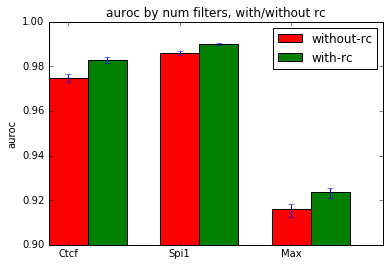

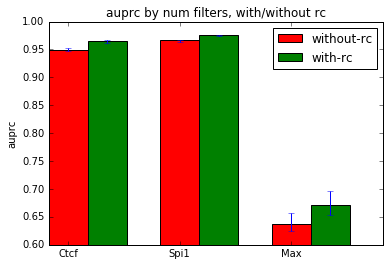

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

without_rc_keys = ['fullCtcf_rc-f_nbf-16_ws-f_str-20', 'Spi1_rc-f_nbf-16_ws-f_str-20', 'Max_rc-f_nbf-16_ws-f_str-20']
with_rc_keys = ['fullCtcf_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20', 'Spi1_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20', 'Max_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20']

for group_stats, stats_name, ymin in [(auroc_per_group, 'auroc', 0.9), (auprc_per_group, 'auprc', 0.6)]:

    N = 3
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots()

    
    all_rects = []
    
    for series_idx, (series, color) in enumerate([(without_rc_keys, 'r'), (with_rc_keys, 'g')]):
        means = np.array([np.mean(group_stats[x]) for x in series])
        upper_error = np.array([np.max(group_stats[x]) for x in series]) - means
        lower_error = np.abs(np.array([np.min(group_stats[x]) for x in series]) - means)
        rects = ax.bar(ind + width*series_idx, means, width, color=color, yerr=[upper_error, lower_error], ecolor='b')
        all_rects.append(rects)
        
    # add some text for labels, title and axes ticks
    ax.set_ylabel(stats_name)
    ax.set_ylim(ymin,1.0)
    ax.set_title(stats_name+' by num filters, with/without rc')
    ax.set_xticks(ind + width / 2.0)
    ax.set_xticklabels(('Ctcf', 'Spi1', 'Max'))
    ax.legend((all_rects[0][0], all_rects[1][0]), ('without-rc', 'with-rc'), loc=0)
    plt.show()